# Dr Semmelweis Handwashing Discovery

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://mediglobus.com/wp-content/uploads/2017/08/AKH-Vienna-General-Hospital-e1528377576504.jpg width=700>

### The Data Source

Dr Semmelweis published his research in 1861.

<img src=https://d3i71xaburhd42.cloudfront.net/7db8525c6a85c5f724a35ea9af1bd6078974696c/6-Table1-1.png width=500>

### Import Statements

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

In [4]:
df_yearly.shape

(12, 4)

In [5]:
df_monthly.shape

(98, 3)

In [6]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [7]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [8]:
df_yearly.sample(6)

year  births  deaths    clinic
7   1842    2659     202  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
6   1841    2442      86  clinic 2
5   1846    4010     459  clinic 1
1   1842    3287     518  clinic 1

In [9]:
df_monthly.sample(6)

date  births  deaths
51 1845-05-01     296      13
84 1848-02-01     291       2
32 1843-10-01     250      44
80 1847-10-01     278      11
83 1848-01-01     283      10
6  1841-07-01     190      16

### Check for Nan Values and Duplicates

In [10]:
df_yearly.isna().values.any()

False

In [11]:
df_monthly.isna().values.any()

False

In [12]:
df_yearly.duplicated().values.any()

False

In [13]:
df_monthly.duplicated().values.any()

False

### Descriptive Statistics

In [14]:
df_yearly.describe()

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

In [15]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

In [16]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [17]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [18]:
df_yearly.deaths.sum()/df_yearly.births.sum() * 100

7.083762852536147

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

In [19]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

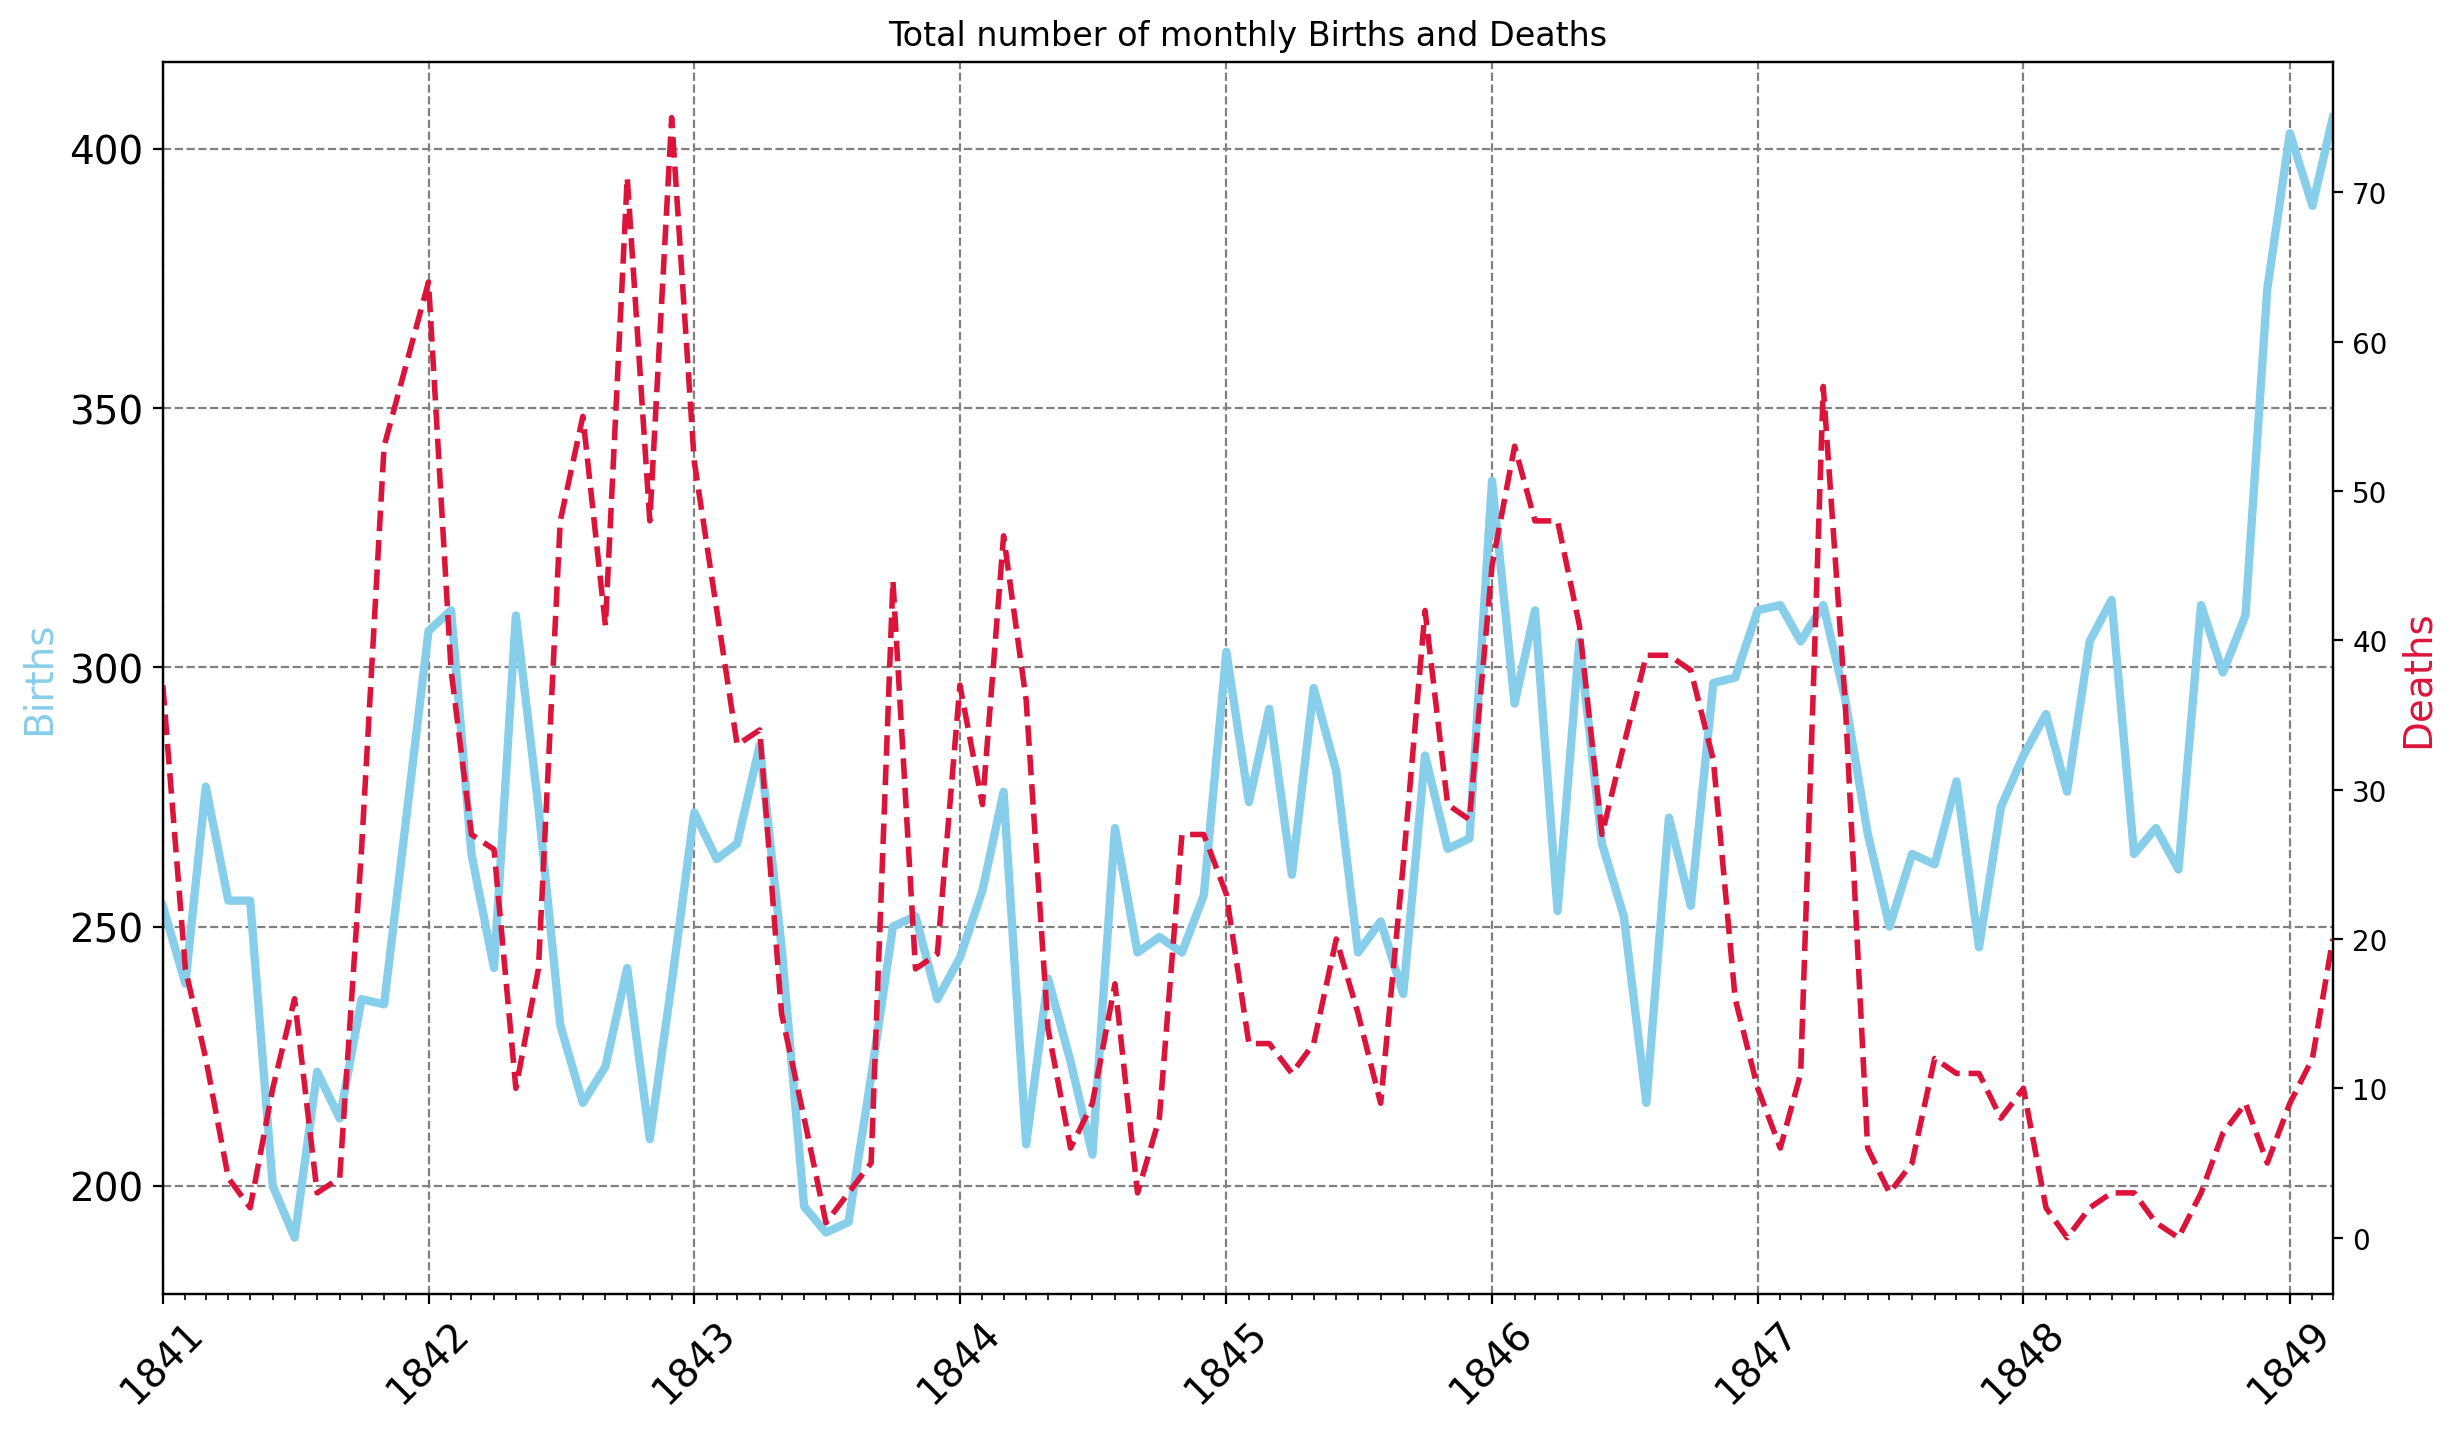

In [20]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total number of monthly Births and Deaths')

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

# ax1.set_ylim([0, 500])
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Births', fontsize=14, color='skyblue')
ax2.set_ylabel('Deaths', fontsize=14, color='crimson')

ax1.plot(df_monthly.date, df_monthly.births, linewidth=3, color='skyblue')
ax2.plot(df_monthly.date, df_monthly.deaths, linewidth=2, color='crimson', linestyle='--')

plt.show()

In [21]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Total yearly Birth by Clinic')

line.show()

In [22]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Total yearly Deaths by Clinic')

line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [23]:
df_yearly['pct_deaths'] = df_yearly.deaths/df_yearly.births

In [24]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3f}%.')

Average death rate in clinic 1 is 9.924%.


In [25]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3f}%.')

Average death rate in clinic 2 is 3.884%.


### Plotting the Proportion of Yearly Deaths by Clinic

In [26]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [27]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [28]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births
df_monthly

date  births  deaths  pct_deaths
0  1841-01-01     254      37        0.15
1  1841-02-01     239      18        0.08
2  1841-03-01     277      12        0.04
3  1841-04-01     255       4        0.02
4  1841-05-01     255       2        0.01
..        ...     ...     ...         ...
93 1848-11-01     310       9        0.03
94 1848-12-01     373       5        0.01
95 1849-01-01     403       9        0.02
96 1849-02-01     389      12        0.03
97 1849-03-01     406      20        0.05

[98 rows x 4 columns]

In [29]:
before_handwash = df_monthly[df_monthly.date < handwashing_start]
before_handwash

date  births  deaths  pct_deaths
0  1841-01-01     254      37        0.15
1  1841-02-01     239      18        0.08
2  1841-03-01     277      12        0.04
3  1841-04-01     255       4        0.02
4  1841-05-01     255       2        0.01
..        ...     ...     ...         ...
71 1847-01-01     311      10        0.03
72 1847-02-01     312       6        0.02
73 1847-03-01     305      11        0.04
74 1847-04-01     312      57        0.18
75 1847-05-01     294      36        0.12

[76 rows x 4 columns]

In [30]:
after_handwash = df_monthly[df_monthly.date >= handwashing_start]
after_handwash

date  births  deaths  pct_deaths
76 1847-06-01     268       6        0.02
77 1847-07-01     250       3        0.01
78 1847-08-01     264       5        0.02
79 1847-09-01     262      12        0.05
80 1847-10-01     278      11        0.04
81 1847-11-01     246      11        0.04
82 1847-12-01     273       8        0.03
83 1848-01-01     283      10        0.04
84 1848-02-01     291       2        0.01
85 1848-03-01     276       0        0.00
86 1848-04-01     305       2        0.01
87 1848-05-01     313       3        0.01
88 1848-06-01     264       3        0.01
89 1848-07-01     269       1        0.00
90 1848-08-01     261       0        0.00
91 1848-09-01     312       3        0.01
92 1848-10-01     299       7        0.02
93 1848-11-01     310       9        0.03
94 1848-12-01     373       5        0.01
95 1849-01-01     403       9        0.02
96 1849-02-01     389      12        0.03
97 1849-03-01     406      20        0.05

In [31]:
before_handwash.deaths.sum()/before_handwash.births.sum() * 100

10.52577793674314

In [32]:
after_handwash.deaths.sum()/after_handwash.births.sum() * 100

2.1531463229719483

### Calculate a Rolling Average of the Death Rate

In [33]:
roll_df = before_handwash.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
roll_df

births  deaths  pct_deaths
date                                  
1841-01-01     NaN     NaN         NaN
1841-02-01     NaN     NaN         NaN
1841-03-01     NaN     NaN         NaN
1841-04-01     NaN     NaN         NaN
1841-05-01     NaN     NaN         NaN
...            ...     ...         ...
1847-01-01  274.50   29.00        0.11
1847-02-01  290.50   23.50        0.08
1847-03-01  296.17   18.83        0.07
1847-04-01  305.83   22.00        0.07
1847-05-01  305.33   22.67        0.07

[76 rows x 3 columns]

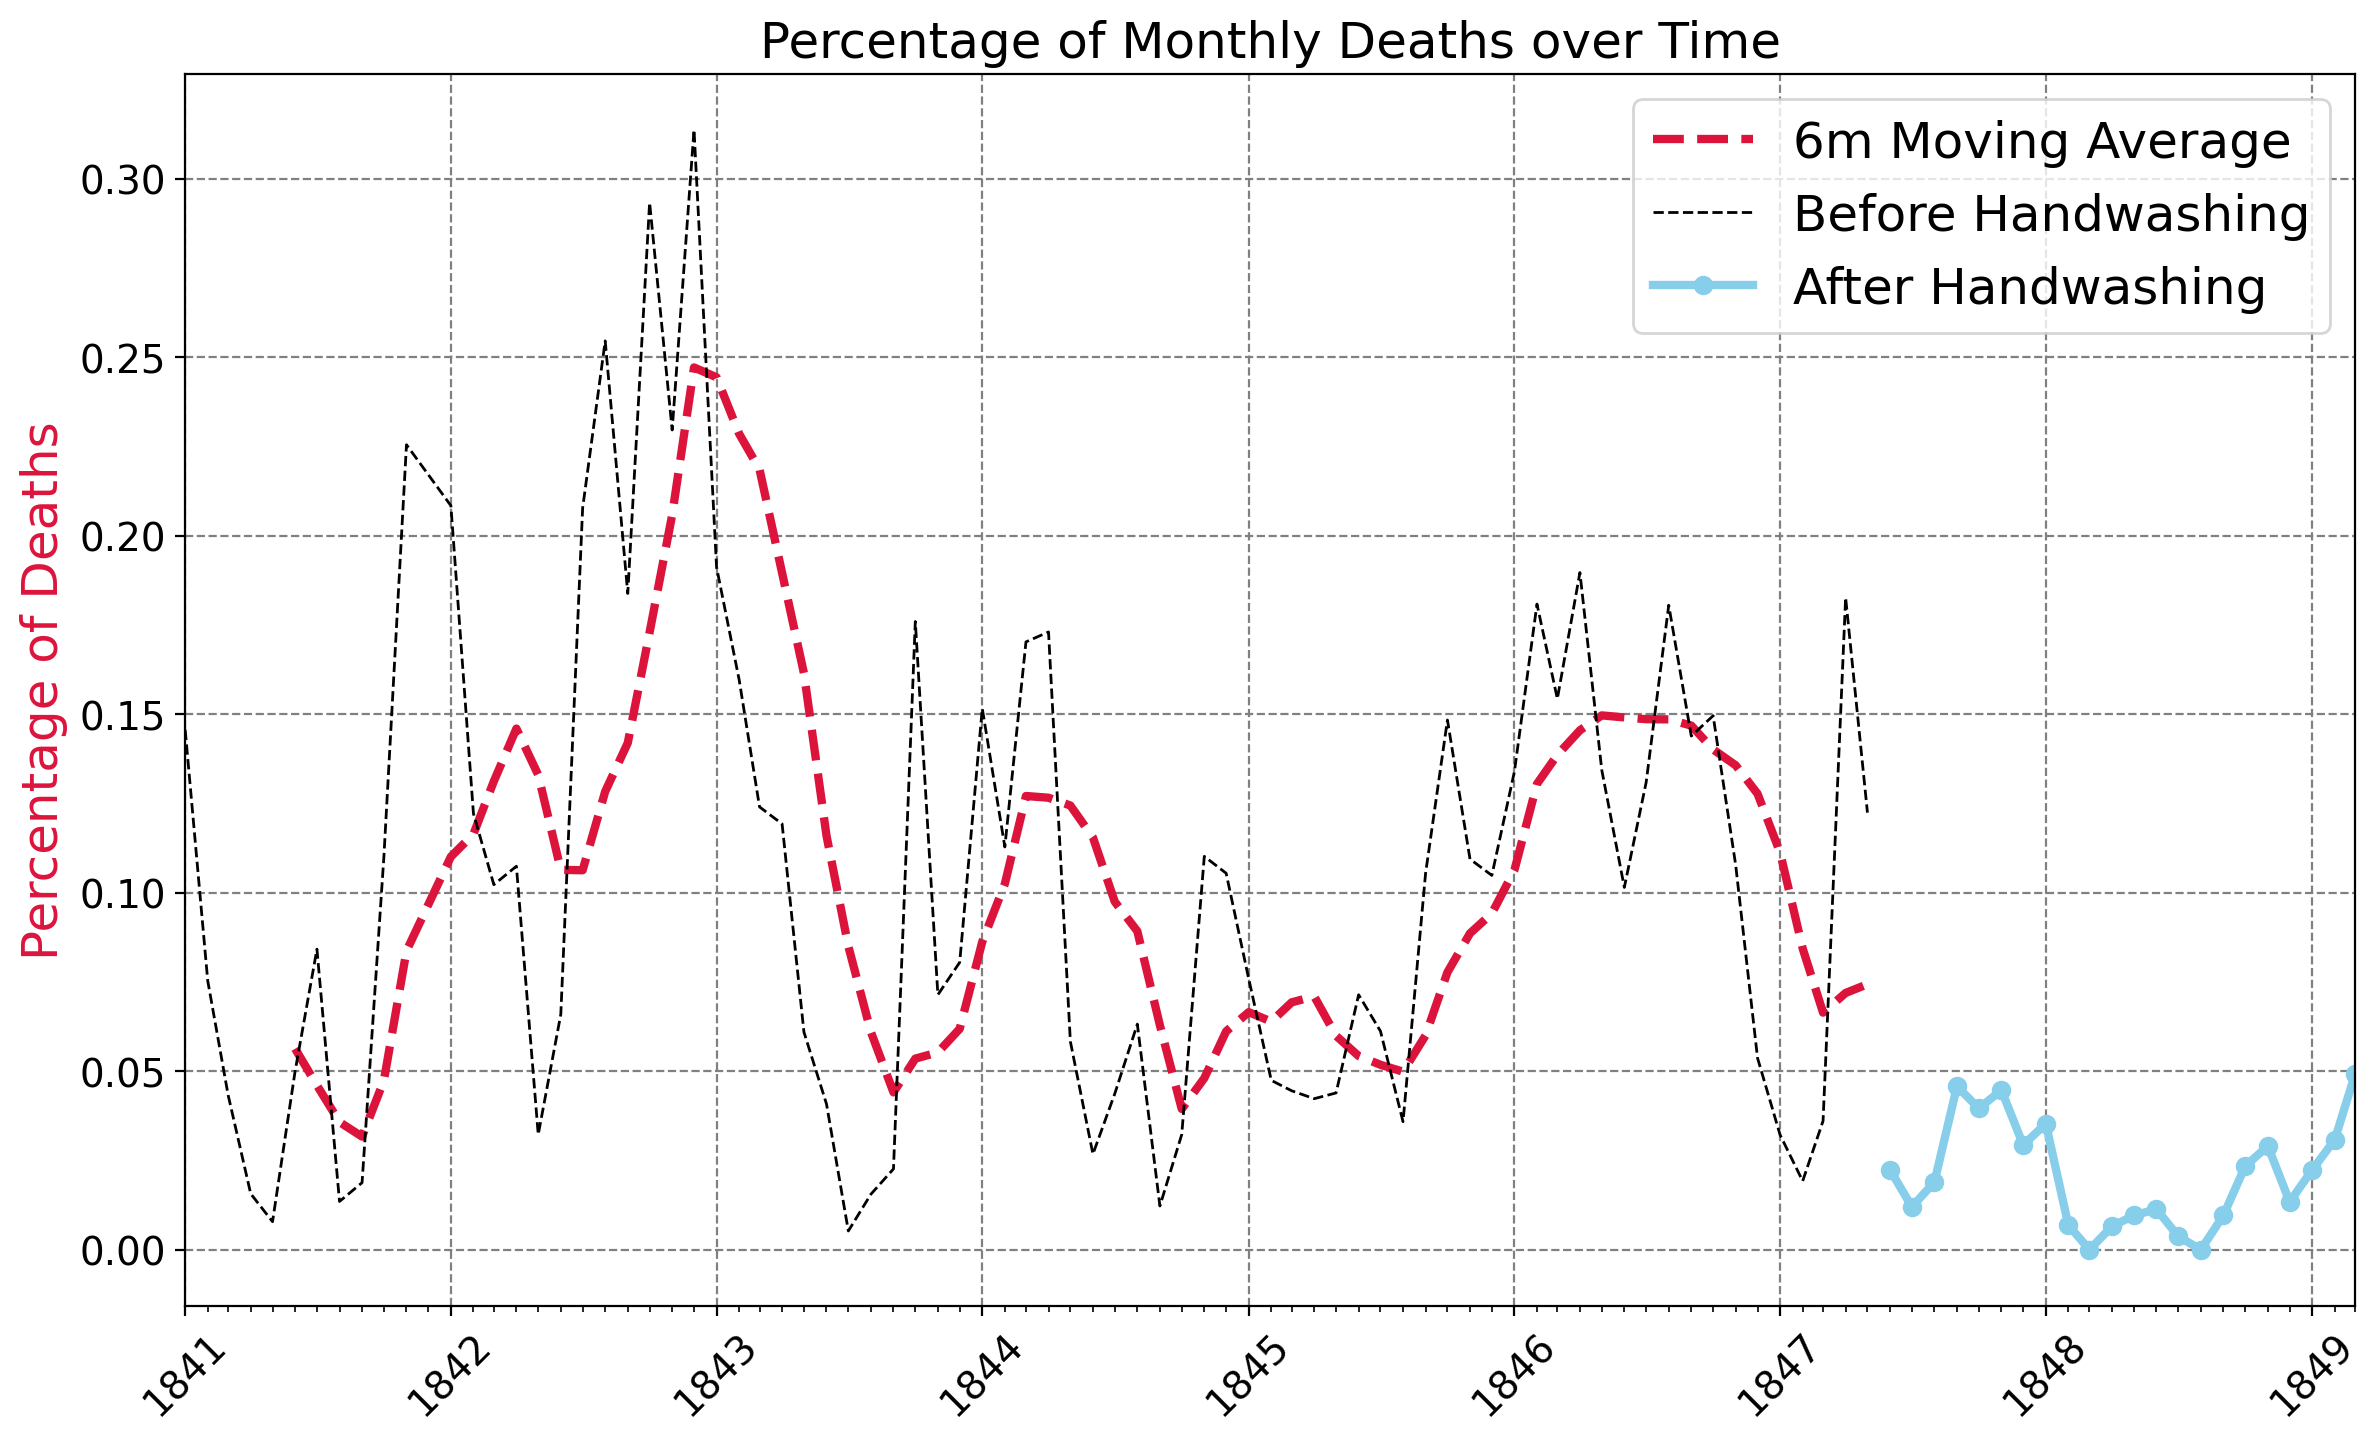

In [34]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_handwash.date, 
                    before_handwash.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_handwash.date, 
                    after_handwash.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

In [35]:
before_handwash.pct_deaths.mean() * 100

10.504998260908794

In [36]:
after_handwash.pct_deaths.mean() * 100

2.1093375097254534

In [37]:
(after_handwash.deaths.sum() - before_handwash.deaths.sum() )/ before_handwash.deaths.sum() * 100

-93.10679611650485

In [38]:
(before_handwash.pct_deaths.mean() * 100)/(after_handwash.pct_deaths.mean() * 100)

4.980235838254306

In [39]:
(before_handwash.pct_deaths.mean() * 100) - (after_handwash.pct_deaths.mean() * 100)

8.39566075118334

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [40]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly

date  births  deaths  pct_deaths washing_hands
0  1841-01-01     254      37        0.15            No
1  1841-02-01     239      18        0.08            No
2  1841-03-01     277      12        0.04            No
3  1841-04-01     255       4        0.02            No
4  1841-05-01     255       2        0.01            No
..        ...     ...     ...         ...           ...
93 1848-11-01     310       9        0.03           Yes
94 1848-12-01     373       5        0.01           Yes
95 1849-01-01     403       9        0.02           Yes
96 1849-02-01     389      12        0.03           Yes
97 1849-03-01     406      20        0.05           Yes

[98 rows x 5 columns]

In [41]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

In [42]:
hist = px.histogram(df_monthly,
                    x='pct_deaths',
                    color='washing_hands',
                    nbins=30,
                    opacity=0.6,
                    barmode='overlay',
                    histnorm='percent',
                    marginal='box')
hist.update_layout(xaxis_title='Proportion of monthly deaths',
                   yaxis_title='Count')

hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

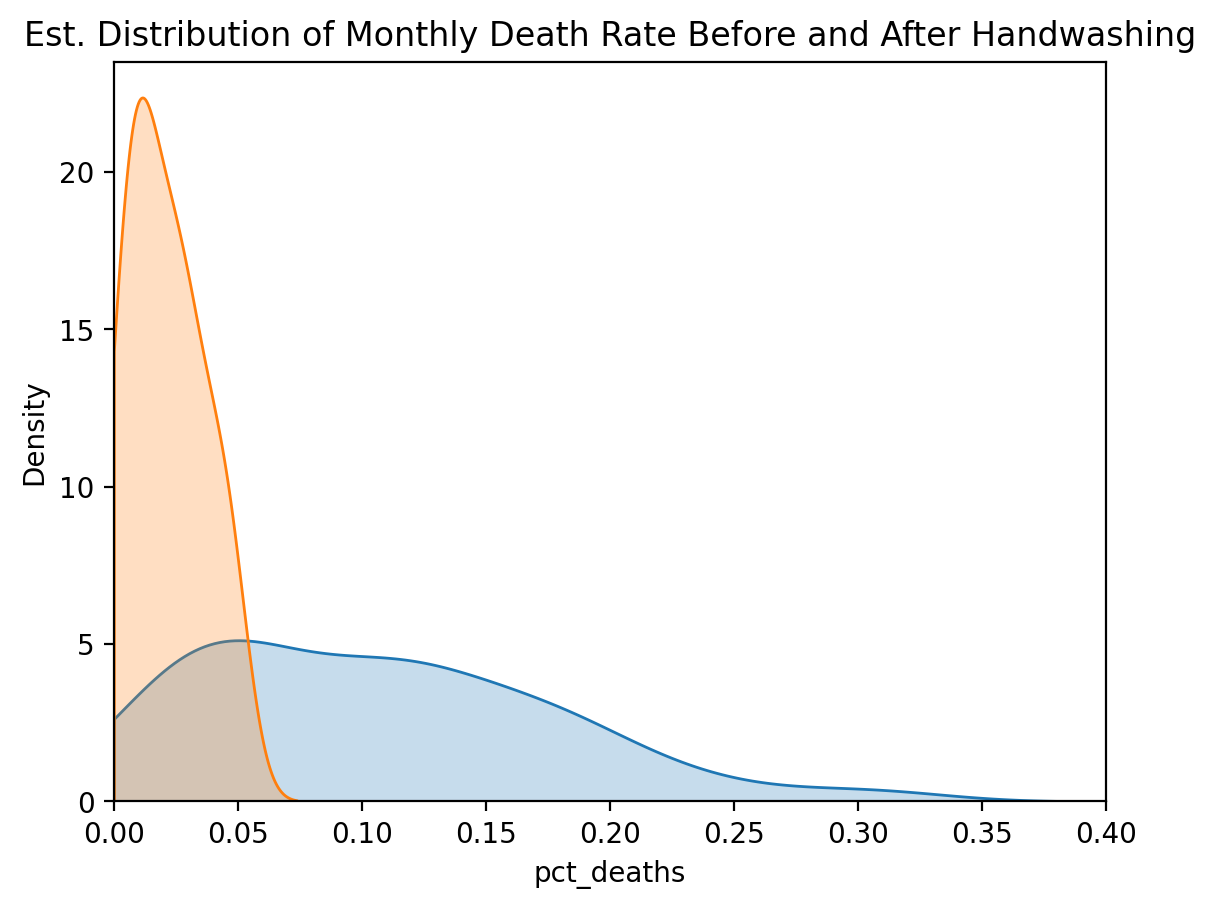

In [43]:
plt.figure(dpi=200)
sns.kdeplot(before_handwash.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_handwash.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

In [44]:
t_stat, p_value = stats.ttest_ind(a=before_handwash.pct_deaths, 
                                  b=after_handwash.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4f}')

p-palue is 0.0000002985
t-statstic is 5.5116
